<font size="5">***----Dependencies and insert data .CSV----*** </font>

In [1]:
!pip install tensorflow tensorflow pandas matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 3.9 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


In [2]:
import os
import pandas as pd
import tensorflow
import numpy

2023-11-23 20:57:25.986589: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 20:57:25.986613: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 20:57:25.986635: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 20:57:25.992562: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
gpu_list = tensorflow.config.list_physical_devices("GPU")
print(gpu_list)

[]


2023-11-23 20:57:31.264368: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-11-23 20:57:31.264395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: user1
2023-11-23 20:57:31.264402: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: user1
2023-11-23 20:57:31.264461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.113.1
2023-11-23 20:57:31.264478: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.113.1
2023-11-23 20:57:31.264482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.113.1


In [4]:
!nvidia-smi

Thu Nov 23 20:57:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Quadro P1000                   Off | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P0              N/A / ERR! |    301MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
dataframe = pd.read_csv(os.path.join("CSV", "use_to_train.csv"))

In [6]:
dataframe[dataframe.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


<font size="5">***----Preprocessing----***</font>

In [7]:
from tensorflow.keras.layers import TextVectorization

In [8]:
x = dataframe["comment_text"]
y = dataframe[dataframe.columns[2:]].values

In [9]:
MAX_FEATURES = 200000

In [10]:
vectorize = TextVectorization(max_tokens=MAX_FEATURES, 
                              output_sequence_length=1800, output_mode='int')

In [11]:
vectorize.adapt(x.values)

In [12]:
vectorize.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [13]:
vectorize_text = vectorize(x.values)

In [14]:
vectorize_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [15]:
dataset = tensorflow.data.Dataset.from_tensor_slices((vectorize_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(18)
dataset = dataset.prefetch(6)
len(dataset)

8866

In [16]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [17]:
int(len(dataset)*.7)

6206

In [18]:
subset_train = dataset.take(int(len(dataset)*.7))
subset_validation = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
subset_test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [19]:
generator_for_training = subset_train.as_numpy_iterator()
generator_for_training.next()

(array([[   2, 2443,  132, ...,    0,    0,    0],
        [  88,    7, 3515, ...,    0,    0,    0],
        [  15,  187,   23, ...,    0,    0,    0],
        ...,
        [1669,   31,  126, ...,    0,    0,    0],
        [ 797,  797,   14, ...,    0,    0,    0],
        [ 494,   11,  116, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

<font size="5">***----Model Creation----***</font>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [21]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation="tanh")))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(6, activation="sigmoid"))

In [22]:
model.compile(loss="BinaryCrossentropy", optimizer = "Adam")

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [23]:
historical = model.fit(subset_train, epochs = 25, validation_data = subset_validation)

Epoch 1/25


2023-10-31 20:46:59.248011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-31 20:46:59.670179: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff3582e9250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 20:46:59.670197: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro P1000, Compute Capability 6.1
2023-10-31 20:46:59.678182: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 20:46:59.765976: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6206/6206 [==============================] - 747s 120ms/step - loss: 0.0624 - val_loss: 0.0463
Epoch 2/25
6206/6206 [==============================] - 685s 110ms/step - loss: 0.0460 - val_loss: 0.0403
Epoch 3/25
6206/6206 [==============================] - 681s 110ms/step - loss: 0.0408 - val_loss: 0.0368
Epoch 4/25
6206/6206 [==============================] - 679s 109ms/step - loss: 0.0369 - val_loss: 0.0331
Epoch 5/25
6206/6206 [==============================] - 679s 109ms/step - loss: 0.0332 - val_loss: 0.0298
Epoch 6/25
6206/6206 [==============================] - 678s 109ms/step - loss: 0.0300 - val_loss: 0.0264
Epoch 7/25
6206/6206 [==============================] - 678s 109ms/step - loss: 0.0271 - val_loss: 0.0237
Epoch 8/25
6206/6206 [==============================] - 678s 109ms/step - loss: 0.0246 - val_loss: 0.0200
Epoch 9/25
6206/6206 [==============================] - 677s 109ms/step - loss: 0.0220 - val_loss: 0.0183
Epoch 10/25
6206/6206 [==============================] - 

In [24]:
model.save("Capstone_Model_Bellamy.h5")

/home/user1/miniconda3/envs/CapstoneBellamyGutierrez/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from tensorflow.keras.models import load_model
model = load_model("Capstone_Model_Bellamy.h5")

<font size="5">***----Graph----***</font>

In [25]:
from matplotlib import pyplot

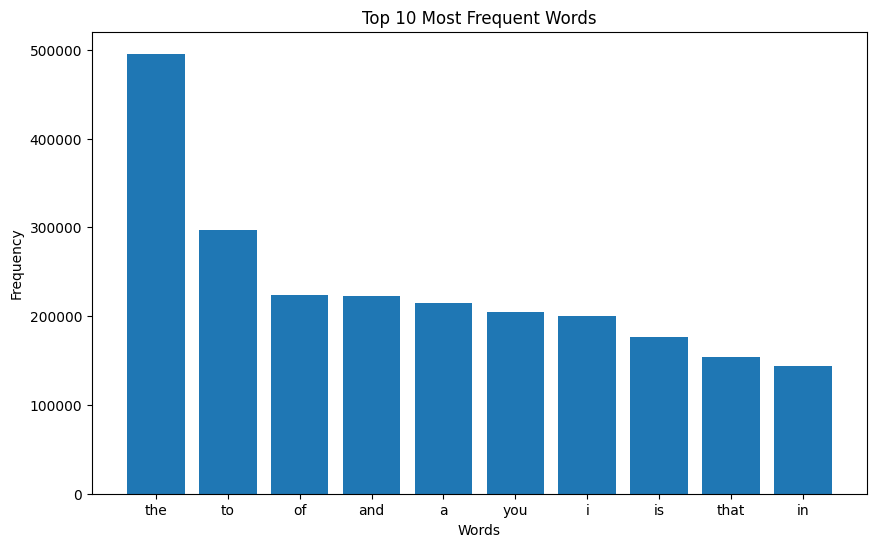

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import re

#Tokenizes the text
def tokenize(text):

    words = re.sub(r"[^a-zA-Z\s]", "", text).lower().split()
    return words

# Apply tokenizer
words = [word for comment in dataframe['comment_text'] for word in tokenize(comment)]


word_freq = Counter(words)

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)


top_words = sorted_word_freq[:10]  # Top 10 words

#bar graph
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()


[nltk_data] Downloading package stopwords to /home/user1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4987/4987 [==============================] - 449s 90ms/step


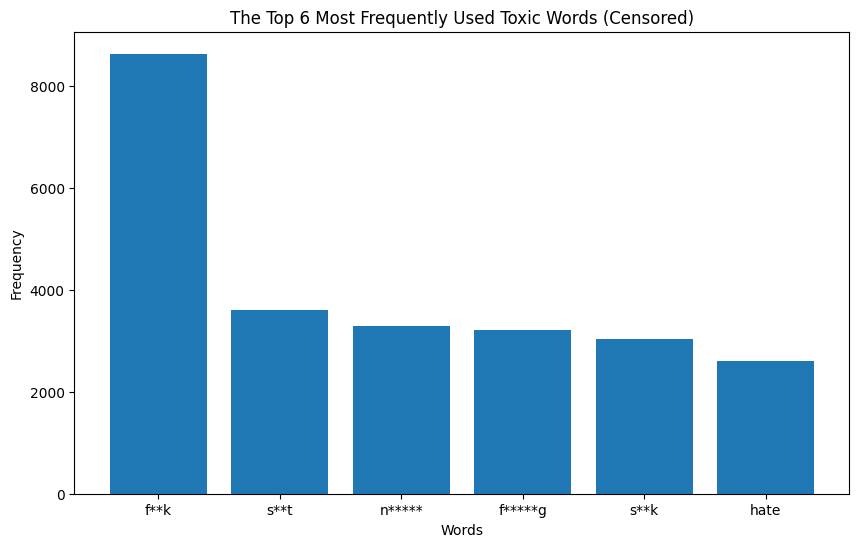

In [26]:
#TEST 2!!!
!pip install nltk
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
import numpy as np

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


model_predictions = model.predict(vectorize(x.values))

toxic_comments = x[np.where(model_predictions[:, 0] > 0.5)[0]]

#tokenizes text
def tokenize(text):
    words = re.sub(r"[^a-zA-Z\s]", "", text).lower().split()
    words = [word for word in words if word not in stop_words]
    return words

toxic_words = [word for comment in toxic_comments for word in tokenize(comment)]

word_freq = Counter(toxic_words)

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)


top_words = sorted_word_freq[:10] 

exclude_words = ['like', 'dont', 'wikipedia', 'go']
filtered_top_words = [word for word in top_words if word[0] not in exclude_words]

def censor_sequences(word, blacklisted_sequences):
    sorted_sequences = sorted(blacklisted_sequences, key=len, reverse=True)
    for sequence in sorted_sequences:
        word = word.replace(sequence, '*' * len(sequence))
    return word

blacklisted_sequences = ['uc', 'hi', 'uckin'] 

censored_top_words = [(censor_sequences(word, blacklisted_sequences), freq) for word, freq in filtered_top_words]

def replace_letters(word, letters_to_censor):
    return ''.join('*' if char in letters_to_censor else char for char in word)


letters_to_censor = ['i', 'g', 'e', 'r']

position_of_nword = 2

if len(censored_top_words) > position_of_nword:
    word_to_censor = censored_top_words[position_of_nword][0]
    censored_word = replace_letters(word_to_censor, letters_to_censor)
    censored_top_words[position_of_nword] = (censored_word, censored_top_words[position_of_nword][1])

#bar graph
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in censored_top_words], [word[1] for word in censored_top_words])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("The Top 6 Most Frequently Used Toxic Words (Censored)")
plt.show()


In [27]:
batch = subset_test.as_numpy_iterator().next()

In [28]:
inputText = vectorize("I hate the show Friends so much. If you like the show Friends, I hate you and I hope you have a bad day.")

In [29]:
dataframe.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [30]:
numpy.set_printoptions(suppress = True)

In [31]:
result = model.predict(numpy.expand_dims(inputText,0))

1/1 [==============================] - 0s 64ms/step


In [32]:
(result > 0.5).astype(int)

array([[1, 0, 0, 0, 0, 0]])

In [33]:
batch_X, batch_y = subset_test.as_numpy_iterator().next()

In [34]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 87ms/step


array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [35]:
result.shape

(1, 6)

In [36]:
from tensorflow.keras.metrics import Recall, Precision, CategoricalAccuracy

In [37]:
recall = Recall()
precision = Precision()
accuracy = CategoricalAccuracy()

In [38]:
for batch in subset_test.as_numpy_iterator():
    x_true, y_true = batch

    yhat = model.predict(x_true)
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    precision.update_state(y_true, yhat)
    recall.update_state(y_true, yhat)
    accuracy.update_state(y_true, yhat)

1/1 [==============================] - 0s 84ms/step


In [39]:
print(f"Recall: {recall.result().numpy()}, Precision: {precision.result().numpy()}, Accuracy: {accuracy.result().numpy()}")

Recall: 0.9800000190734863, Precision: 0.9701617360115051, Accuracy: 0.4932279884815216


In [40]:
!pip install gradio jinja2

In [41]:
import tensorflow as tensorflow
import gradio as gradio

In [42]:
model = tensorflow.keras.models.load_model("Capstone_Model_Bellamy.h5")

In [43]:
text_input_string = vectorize("I hate the show Friends so much. If you like the show Friends, I hate you and I hope you have a bad day.")

In [44]:
result = model.predict(numpy.expand_dims(text_input_string, 0))

1/1 [==============================] - 0s 490ms/step


In [45]:
result

array([[0.97914636, 0.00003051, 0.00015037, 0.00349017, 0.00009429,
        0.0000894 ]], dtype=float32)

In [46]:
def score_comment(comment):
    vectorize_comment = vectorize([comment])
    results = model.predict(vectorize_comment)
    
    text = ''
    for idx, col in enumerate(dataframe.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [47]:
interface = gradio.Interface(fn=score_comment, 
                         inputs=gradio.components.Textbox(lines=4, placeholder="Enter text here"),
                        outputs='text')

In [48]:

interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://16294de7e0afb125fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 46ms/step
